# 1. 요약/절차
## 1.1. 데이터
  - pixabay에서 거리로 검색하여 이미지 파일 받음 : 출처 밝히지 않아도 되는 이미지
  - 이미지를 디렉토리에 저장
  
## 1.2. 이미지 출력
  - 벽에 그려진 이미지 : 그림 속의 문자 인식
  - 간판들이 겹쳐진 이미지 : 한글, 한자, 일본어, 영어, 특수 문자까지 포함된 이미지
  - 흑백 이미지 
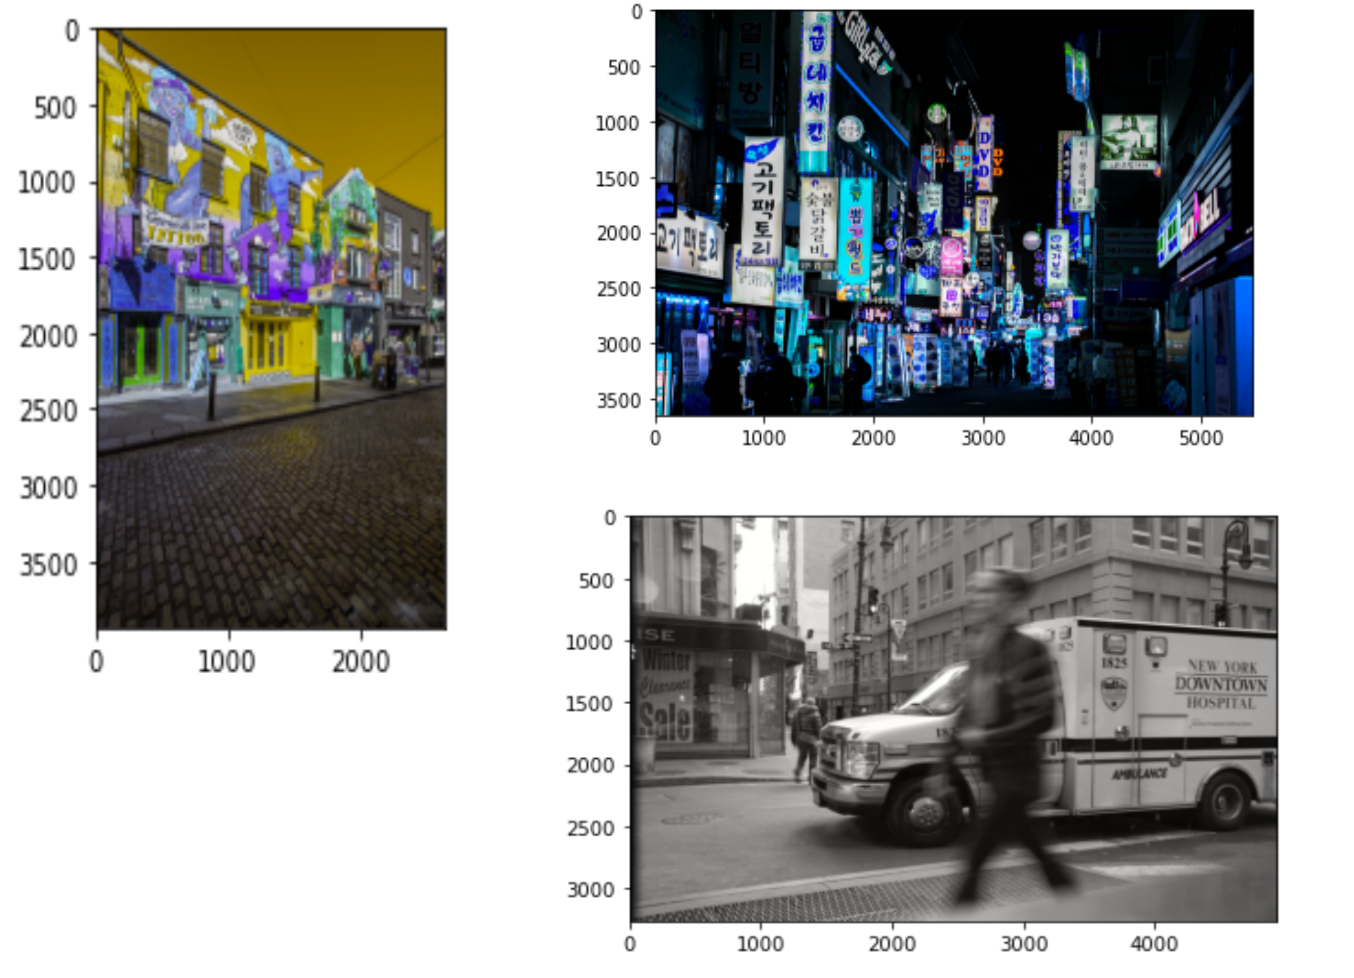

  
  - 각각 특징이 다른 이미지에서 문자 판독이 가능한가 확인




## 1.3. 문자 detect
  - google ocr api
  - keras ocr
  - tesseract
  

# 2. 결과
## 1. google ocr api
  - 한 이미지의 결과 : 길이가 너무 길어짐  
  
"SKATE  
CITY  
Conneced duk  
IATTOO  
All  
Out  
Design  
CAFE  
MINERO  
ONNECT ED  
INK  
MNERO  
THE PIEWAN CAFE  
HOAD FO ESH ROAST CO HONE AES  
TEMPLEBAR  
JAM ART FACTORY  
CRU  
12  
RER SHR  
AKRR ENIL  
SKATE TY 1 FLOOR  
IRISH DESIGN  
LOOK INTO  
MY PIES  
THE FLEMAN CAFE  
14a  
ATE 
P.  
EMAN  
PEN  
Ratauran  
ROKUS:  
martfactory.com  
TATTOO  
PIERCING  
CONNECTWDINK H  
TATTO  
"  


"SKATE"

"CITY"

"Conneced"

"duk"

"IATTOO"

"All"

"Out"

"Design"

"CAFE"

"MINERO"

"ONNECT"

"ED"

"INK"

"MNERO"

"THE"

"PIEWAN"

"CAFE"

"HOAD"

"FO"

"ESH"

"ROAST"

"CO"

"HONE"

"AES"

"TEMPLEBAR"

"JAM"

"ART"

"FACTORY"

"CRU"

"12"

"RER"

"SHR"

"AKRR"

"ENIL"

"SKATE"

"TY"

"1"

"FLOOR"

"IRISH"

"DESIGN"

"LOOK"

"INTO"

"MY"

"PIES"

"THE"

"FLEMAN"

"CAFE"

"14a"

"ATE"

"P."

"EMAN"

"PEN"

"Ratauran"

"ROKUS:"

"martfactory.com"

"TATTOO"

"PIERCING"

"CONNECTWDINK"

"H"

"TATTO"  
  
      
      

  
  

## 2. keras ocr
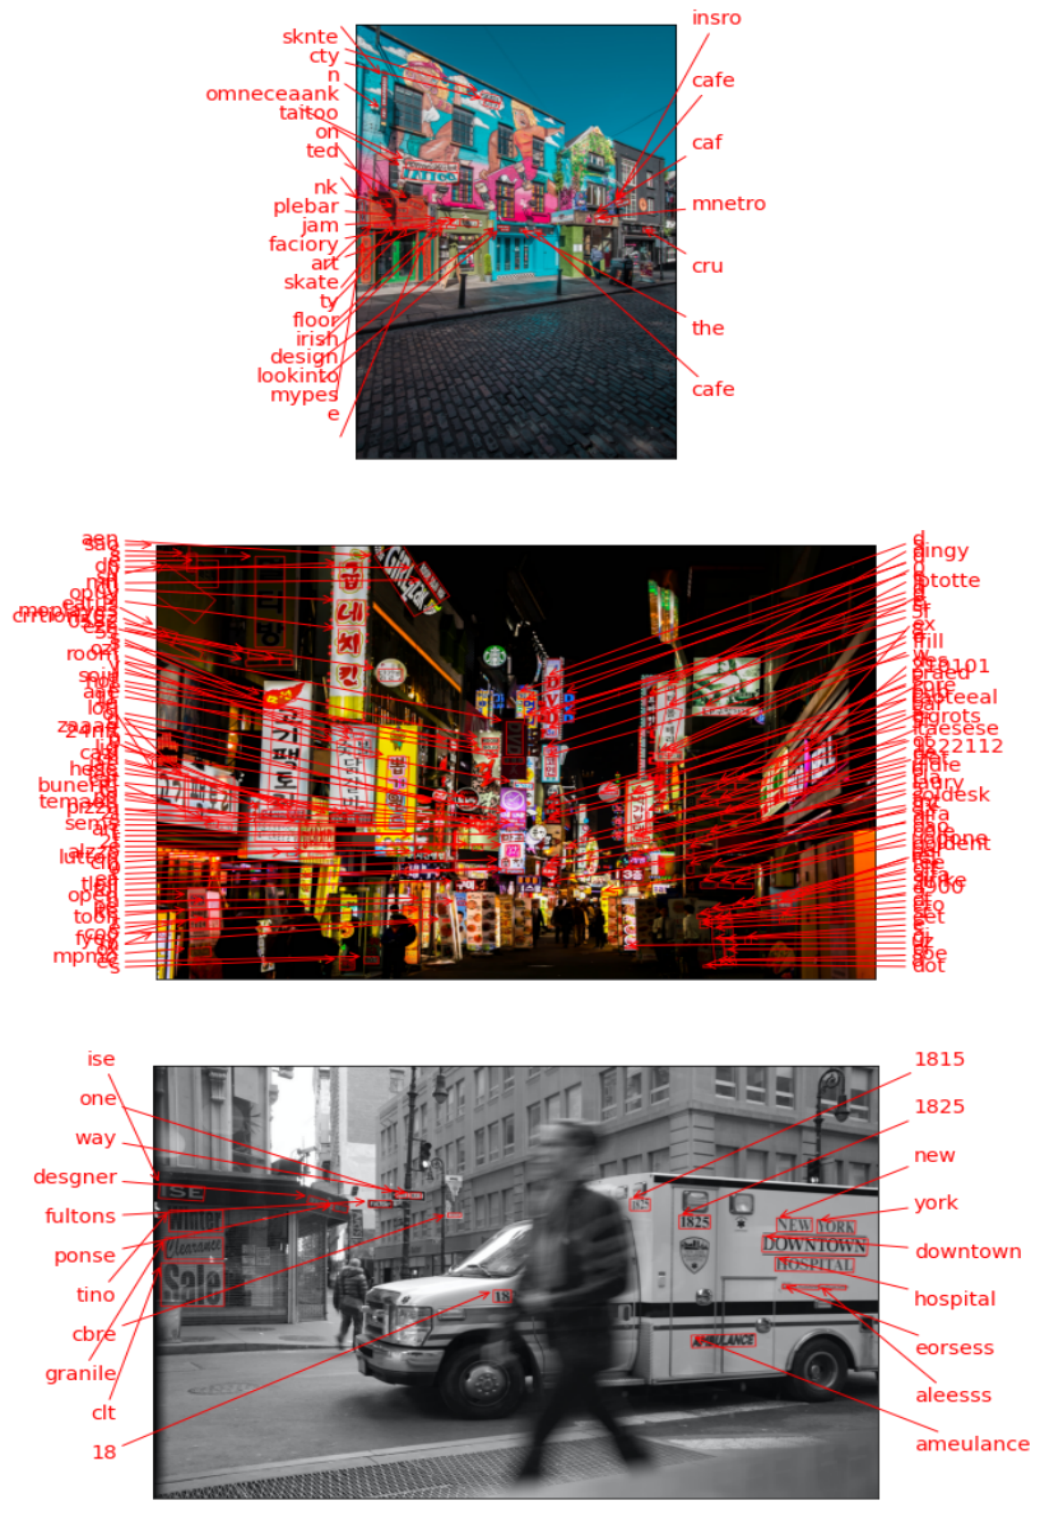
  
    
  
  
  
  
  
        
## 3. tesseract
  - 오류발생 : left, top, width, height를 출력해봄
    - /home/aiffel/aiffel/ocr_python/result/0000.png
    - 0 0 0 1606
  - 아래 코드를 삽입시켜 오류 없앰.  
    - 네 값을 곱해 0이 되면 건너뛰도록 함
  
  
     if left * top * width * height == 0:
           continue


  - 이것도 결과물 하나만 게시
  
    
/home/aiffel/aiffel/ocr_python/result/0000.png  
/home/aiffel/aiffel/ocr_python/result/0001.png  
/home/aiffel/aiffel/ocr_python/result/0002.png  
/home/aiffel/aiffel/ocr_python/result/0003.png  
/home/aiffel/aiffel/ocr_python/result/0004.png  
/home/aiffel/aiffel/ocr_python/result/0005.png  
/home/aiffel/aiffel/ocr_python/result/0005.png  
/home/aiffel/aiffel/ocr_python/result/0006.png  
/home/aiffel/aiffel/ocr_python/result/0007.png  
/home/aiffel/aiffel/ocr_python/result/0008.png    

  

oe  

E  

E  

=  

as Oe  

aa  

|  

Done  


# 3. 회고

  - 어려웠던 점
    - tesseract에서 발생한 오류를 찾기 어려움
    - 두 번째 이미지의 간판이 너무 많아서 표현하기가 어려움
    - 함수나 메서드의 사용이 많이 어려움
      - 어떤 경우에 어떤 함수를 써야 하는지
      - 그 함수의 인자들을 어떻게 찾을 수 있는지
      - 같은 기능을 하는 다른 함수를 어떻게 찾을지
        - 예를 들면, 이미지 파일을 불러오는 함수가 패키지마다 다르게 있는 듯함
        - 어떤 경우, 어떤 함수를 사용하면 되는지 아직 잘 알지 못함
      - 매서드도 마찬가지
        - 어떤 메서드가 있는지 파악이 안됨  
        
  - 느낀 점
    - 이번 과제는 좀 편한 마음으로 접근함
    - 코드를 보고 노드를 보면서 이해할려고 노력하다 보니 조금 쉽게 접근할 수 있었음
    - 노드를 몇 번씩 반복하고 잘 모르는 부분은 많이 고민해봄
    - 새로운 것을 많이 익히게 되어 즐거움
    
    

In [4]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [5]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

#!pip install google-cloud-vision
import os
import tensorflow as tf

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
#path = os.getenv('HOME')+'/aiffel/ocr_python//image_data/pexels-francesco-lick-5908888.jpg'# [[YOUR IMAGE FILE PATH]]   
filenames = tf.io.gfile.glob("./image_data/*.jpg")

filenames    
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
#detect_text(path)

-rw-rw-r-- 1 aiffel aiffel 2329 Mar 13 15:57 /home/aiffel/aiffel/ocr_python/my_google_api_key.json


['./image_data/pexels-mark-dalton-1208783.jpg',
 './image_data/pexels-pixabay-373290.jpg',
 './image_data/pexels-francesco-lick-5908888.jpg']

In [6]:
f_names = ['mark_dalton', 'pixabay', 'francesco_lick']

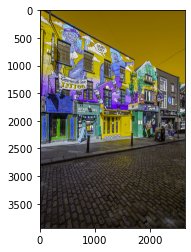

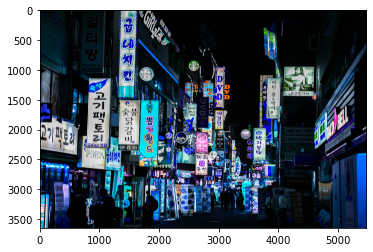

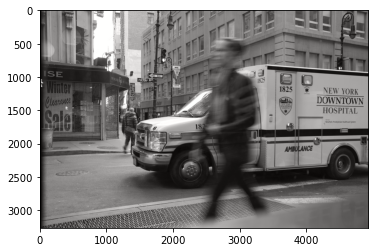

In [7]:
import matplotlib.pyplot as plt
import cv2

# plt.figure(figsize=(1, 3))

for i, filename in enumerate(filenames):
    image_path = os.getenv('HOME')+'/work/project/pro_18_OCR/' + filename
    image_bgr = cv2.imread(image_path)
    image_show = image_bgr.copy()
#     plt.subplot(1, 3, i+1)
    plt.imshow(image_bgr)
    plt.show()

In [8]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

#!pip install google-cloud-vision
import os
import tensorflow as tf

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

for filename in filenames:
    detect_text(filename)

-rw-rw-r-- 1 aiffel aiffel 2329 Mar 13 15:57 /home/aiffel/aiffel/ocr_python/my_google_api_key.json
Texts:

"SKATE
CITY
Conneced duk
IATTOO
All
Out
Design
CAFE
MINERO
ONNECT ED
INK
MNERO
THE PIEWAN CAFE
HOAD FO ESH ROAST CO HONE AES
TEMPLEBAR
JAM ART FACTORY
CRU
12
RER SHR
AKRR ENIL
SKATE TY 1 FLOOR
IRISH DESIGN
LOOK INTO
MY PIES
THE FLEMAN CAFE
14a
ATE
P.
EMAN
PEN
Ratauran
ROKUS:
martfactory.com
TATTOO
PIERCING
CONNECTWDINK H
TATTO
"

"SKATE"

"CITY"

"Conneced"

"duk"

"IATTOO"

"All"

"Out"

"Design"

"CAFE"

"MINERO"

"ONNECT"

"ED"

"INK"

"MNERO"

"THE"

"PIEWAN"

"CAFE"

"HOAD"

"FO"

"ESH"

"ROAST"

"CO"

"HONE"

"AES"

"TEMPLEBAR"

"JAM"

"ART"

"FACTORY"

"CRU"

"12"

"RER"

"SHR"

"AKRR"

"ENIL"

"SKATE"

"TY"

"1"

"FLOOR"

"IRISH"

"DESIGN"

"LOOK"

"INTO"

"MY"

"PIES"

"THE"

"FLEMAN"

"CAFE"

"14a"

"ATE"

"P."

"EMAN"

"PEN"

"Ratauran"

"ROKUS:"

"martfactory.com"

"TATTOO"

"PIERCING"

"CONNECTWDINK"

"H"

"TATTO"
bounds: (108,1963),(104,2237),(46,2236),(50,1962)
Text

In [9]:
#!pip install keras-ocr

import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel/.keras-ocr/crnn_kurapan.h5


In [10]:
prediction_groups = [pipeline.recognize([filename]) for filename in filenames]

In [11]:
images = [ keras_ocr.tools.read(filename) for filename in filenames]

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


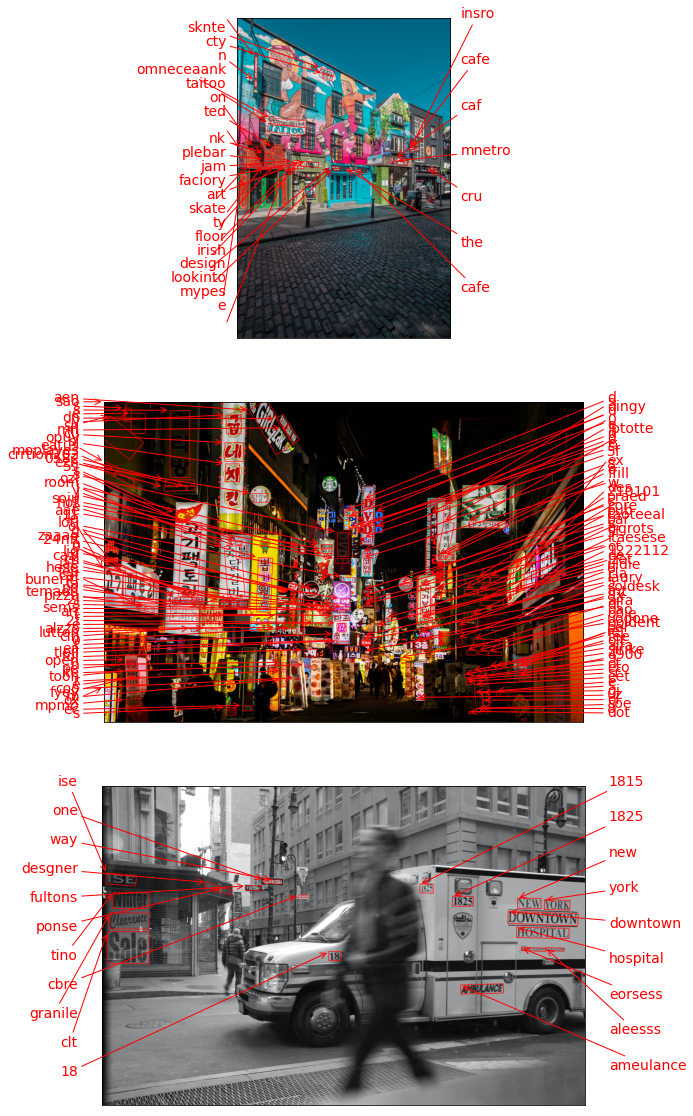

In [12]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [22]:
#!pip install pytesseract

import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.
# image_path = os.getenv('HOME')+'/aiffel/ocr_python/image_data/pexels-pixabay-373290.jpg'
# output_path = os.getenv('HOME')+'/aiffel/ocr_python/image_data'

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):

    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
#             print(left, top, width, height)
            
            if left*top*width*height == 0:
                continue
                
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


In [23]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
# recognize_images(cropped_image_path_list)

In [24]:
for filename in filenames:
    work_dir = os.getenv('HOME')+'/aiffel/ocr_python/result'
    img_file_path = work_dir + '/test_image.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

    cropped_image_path_list = crop_word_regions(filename, work_dir)
    recognize_images(cropped_image_path_list)

/home/aiffel/aiffel/ocr_python/result/0000.png
/home/aiffel/aiffel/ocr_python/result/0001.png
/home/aiffel/aiffel/ocr_python/result/0002.png
/home/aiffel/aiffel/ocr_python/result/0003.png
/home/aiffel/aiffel/ocr_python/result/0004.png
/home/aiffel/aiffel/ocr_python/result/0005.png
/home/aiffel/aiffel/ocr_python/result/0005.png
/home/aiffel/aiffel/ocr_python/result/0006.png
/home/aiffel/aiffel/ocr_python/result/0007.png
/home/aiffel/aiffel/ocr_python/result/0008.png


oe

E

E

=

as Oe

aa

|

Done
/home/aiffel/aiffel/ocr_python/result/0000.png
/home/aiffel/aiffel/ocr_python/result/0000.png
/home/aiffel/aiffel/ocr_python/result/0001.png
/home/aiffel/aiffel/ocr_python/result/0002.png
/home/aiffel/aiffel/ocr_python/result/0003.png
/home/aiffel/aiffel/ocr_python/result/0004.png
/home/aiffel/aiffel/ocr_python/result/0005.png
/home/aiffel/aiffel/ocr_python/result/0006.png
/home/aiffel/aiffel/ocr_python/result/0007.png
/home/aiffel/aiffel/ocr_python/result/0008.png
/home/aiffel/aiff

In [ ]:
# left, top, width, height를 출력한 자료

"""
/home/aiffel/aiffel/ocr_python/result/0000.png
1304 190 1320 2152
/home/aiffel/aiffel/ocr_python/result/0001.png
2197 1942 28 70
/home/aiffel/aiffel/ocr_python/result/0002.png
2184 2122 44 8
/home/aiffel/aiffel/ocr_python/result/0003.png
2167 1910 32 110
/home/aiffel/aiffel/ocr_python/result/0004.png
2168 2036 34 80
/home/aiffel/aiffel/ocr_python/result/0005.png
0 86 1476 2518
/home/aiffel/aiffel/ocr_python/result/0005.png
1324 2258 17 12
/home/aiffel/aiffel/ocr_python/result/0006.png
1421 2257 36 19
/home/aiffel/aiffel/ocr_python/result/0007.png
1343 2258 64 41
/home/aiffel/aiffel/ocr_python/result/0008.png
1434 2275 26 11


oe

E

E

=

as Oe

aa

|

Done
/home/aiffel/aiffel/ocr_python/result/0000.png
0 0 0 1606
/home/aiffel/aiffel/ocr_python/result/0000.png
3973 2157 20 173
/home/aiffel/aiffel/ocr_python/result/0001.png
3974 2343 17 17
/home/aiffel/aiffel/ocr_python/result/0002.png
3907 1759 35 39
/home/aiffel/aiffel/ocr_python/result/0003.png
3943 1821 32 41
/home/aiffel/aiffel/ocr_python/result/0004.png
3885 1758 10 21
/home/aiffel/aiffel/ocr_python/result/0005.png
3875 1825 13 51
/home/aiffel/aiffel/ocr_python/result/0006.png
3884 2025 3 3
/home/aiffel/aiffel/ocr_python/result/0007.png
3894 2144 8 5
/home/aiffel/aiffel/ocr_python/result/0008.png
3883 2227 33 22
/home/aiffel/aiffel/ocr_python/result/0009.png
3838 1748 78 29
/home/aiffel/aiffel/ocr_python/result/0010.png
3865 1794 24 2
/home/aiffel/aiffel/ocr_python/result/0011.png
3845 1916 44 33
/home/aiffel/aiffel/ocr_python/result/0012.png
3873 1967 11 34
/home/aiffel/aiffel/ocr_python/result/0013.png
3848 2108 59 80
/home/aiffel/aiffel/ocr_python/result/0014.png
3852 2207 46 78
/home/aiffel/aiffel/ocr_python/result/0015.png
3802 1098 39 54
/home/aiffel/aiffel/ocr_python/result/0016.png
3786 1529 67 290
/home/aiffel/aiffel/ocr_python/result/0017.png
3798 2033 53 119
/home/aiffel/aiffel/ocr_python/result/0018.png
3733 1273 65 290
/home/aiffel/aiffel/ocr_python/result/0019.png
3538 2190 25 47
/home/aiffel/aiffel/ocr_python/result/0020.png
3542 2320 23 37
/home/aiffel/aiffel/ocr_python/result/0021.png
3499 2162 34 15
/home/aiffel/aiffel/ocr_python/result/0022.png
3507 2252 30 38
/home/aiffel/aiffel/ocr_python/result/0023.png
3493 2317 49 17
/home/aiffel/aiffel/ocr_python/result/0024.png
3497 2032 8 13
/home/aiffel/aiffel/ocr_python/result/0025.png
3487 2139 7 6
/home/aiffel/aiffel/ocr_python/result/0026.png
3487 2248 23 46
/home/aiffel/aiffel/ocr_python/result/0027.png
3488 2362 15 36
/home/aiffel/aiffel/ocr_python/result/0028.png
3464 2103 17 9
/home/aiffel/aiffel/ocr_python/result/0029.png
3455 2133 32 12
/home/aiffel/aiffel/ocr_python/result/0030.png
3465 2208 13 26
/home/aiffel/aiffel/ocr_python/result/0031.png
3463 2315 20 28
/home/aiffel/aiffel/ocr_python/result/0032.png
3464 2413 12 12
/home/aiffel/aiffel/ocr_python/result/0033.png
3434 2086 27 27
/home/aiffel/aiffel/ocr_python/result/0034.png
3415 2082 18 31
/home/aiffel/aiffel/ocr_python/result/0035.png
3397 2079 16 35
/home/aiffel/aiffel/ocr_python/result/0036.png
0 0 2434 3648
/home/aiffel/aiffel/ocr_python/result/0036.png
2146 1576 72 234
/home/aiffel/aiffel/ocr_python/result/0037.png
2150 1598 14 137
/home/aiffel/aiffel/ocr_python/result/0038.png
2144 1772 18 19
/home/aiffel/aiffel/ocr_python/result/0039.png
2121 1817 19 72
/home/aiffel/aiffel/ocr_python/result/0040.png
2104 1929 41 53
/home/aiffel/aiffel/ocr_python/result/0041.png
1070 2234 50 58
/home/aiffel/aiffel/ocr_python/result/0042.png
1038 2234 20 33
/home/aiffel/aiffel/ocr_python/result/0043.png
1010 2236 42 56
/home/aiffel/aiffel/ocr_python/result/0044.png
943 2248 45 42
/home/aiffel/aiffel/ocr_python/result/0045.png
740 2233 194 78
/home/aiffel/aiffel/ocr_python/result/0046.png
3674 1791 71 184
/home/aiffel/aiffel/ocr_python/result/0047.png
3611 2020 132 400
/home/aiffel/aiffel/ocr_python/result/0048.png
3699 2465 26 15
/home/aiffel/aiffel/ocr_python/result/0049.png
0 0 0 0
/home/aiffel/aiffel/ocr_python/result/0049.png
3185 2905 20 56
/home/aiffel/aiffel/ocr_python/result/0050.png
2271 1607 191 1921
,

4

7 f

a

-


-—

-

is

>» OL:

— ©

i


Ey

. g

—


J


7)




—a si

\

<

o'

fe

4

4

p


ey

aan

=

3

6




te

OF

“|

5

JF

ML CAA

4


ra



Done
/home/aiffel/aiffel/ocr_python/result/0000.png
4142 1296 706 154
/home/aiffel/aiffel/ocr_python/result/0001.png
4237 1459 516 92
/home/aiffel/aiffel/ocr_python/result/0002.png
112 1541 78 115
/home/aiffel/aiffel/ocr_python/result/0003.png
192 1655 4 1
/home/aiffel/aiffel/ocr_python/result/0004.png
176 1565 28 35
/home/aiffel/aiffel/ocr_python/result/0005.png
170 1507 107 150
/home/aiffel/aiffel/ocr_python/result/0006.png
270 1566 31 15
/home/aiffel/aiffel/ocr_python/result/0007.png
293 1440 1 3
/home/aiffel/aiffel/ocr_python/result/0008.png
335 1492 104 34
/home/aiffel/aiffel/ocr_python/result/0009.png
394 1563 13 2
/home/aiffel/aiffel/ocr_python/result/0010.png
387 1548 97 54
/home/aiffel/aiffel/ocr_python/result/0011.png
494 1544 47 132
/home/aiffel/aiffel/ocr_python/result/0012.png
87 1662 41 33
/home/aiffel/aiffel/ocr_python/result/0013.png
283 1843 5 2
/home/aiffel/aiffel/ocr_python/result/0014.png
253 1697 72 110
/home/aiffel/aiffel/ocr_python/result/0015.png
257 1622 70 72
/home/aiffel/aiffel/ocr_python/result/0016.png
338 1828 22 3
/home/aiffel/aiffel/ocr_python/result/0017.png
330 1800 59 21
/home/aiffel/aiffel/ocr_python/result/0018.png
334 1548 51 258
/home/aiffel/aiffel/ocr_python/result/0019.png
330 1564 59 11
/home/aiffel/aiffel/ocr_python/result/0020.png
330 1544 59 21
/home/aiffel/aiffel/ocr_python/result/0021.png
361 1827 20 3
/home/aiffel/aiffel/ocr_python/result/0022.png
382 1826 52 35
/home/aiffel/aiffel/ocr_python/result/0023.png
86 1705 72 62
/home/aiffel/aiffel/ocr_python/result/0024.png
164 1716 61 34
/home/aiffel/aiffel/ocr_python/result/0025.png
218 1690 56 75
/home/aiffel/aiffel/ocr_python/result/0026.png
401 1716 18 52
/home/aiffel/aiffel/ocr_python/result/0027.png
388 1574 49 121
/home/aiffel/aiffel/ocr_python/result/0028.png
474 1827 10 15
/home/aiffel/aiffel/ocr_python/result/0029.png
437 1715 46 90
/home/aiffel/aiffel/ocr_python/result/0030.png
403 1605 83 86
/home/aiffel/aiffel/ocr_python/result/0031.png
66 1754 156 66
/home/aiffel/aiffel/ocr_python/result/0032.png
2424 2877 5 20
/home/aiffel/aiffel/ocr_python/result/0033.png
2429 2873 10 29
/home/aiffel/aiffel/ocr_python/result/0034.png
965 2923 176 13
/home/aiffel/aiffel/ocr_python/result/0035.png
1316 2911 20 13
/home/aiffel/aiffel/ocr_python/result/0036.png
1509 2934 4 3
/home/aiffel/aiffel/ocr_python/result/0037.png
1593 2931 3 2
/home/aiffel/aiffel/ocr_python/result/0038.png
2198 2896 178 38
/home/aiffel/aiffel/ocr_python/result/0039.png
2378 2895 70 42
/home/aiffel/aiffel/ocr_python/result/0040.png
415 2940 159 34
/home/aiffel/aiffel/ocr_python/result/0041.png
720 2943 165 31
/home/aiffel/aiffel/ocr_python/result/0042.png
934 2937 147 31
/home/aiffel/aiffel/ocr_python/result/0043.png
1456 2926 58 43
/home/aiffel/aiffel/ocr_python/result/0044.png
1784 2971 6 1
/home/aiffel/aiffel/ocr_python/result/0045.png
1876 2945 105 15
/home/aiffel/aiffel/ocr_python/result/0046.png
1995 2909 175 69
/home/aiffel/aiffel/ocr_python/result/0047.png
2272 2913 124 61
/home/aiffel/aiffel/ocr_python/result/0048.png
259 3050 12 2
/home/aiffel/aiffel/ocr_python/result/0049.png
492 3031 5 2
/home/aiffel/aiffel/ocr_python/result/0050.png
1258 3043 11 2
/home/aiffel/aiffel/ocr_python/result/0051.png
1831 3014 344 79
/home/aiffel/aiffel/ocr_python/result/0052.png
176 3060 47 3
/home/aiffel/aiffel/ocr_python/result/0053.png
652 3052 68 10
/home/aiffel/aiffel/ocr_python/result/0054.png
100 3065 164 27
/home/aiffel/aiffel/ocr_python/result/0055.png
510 3064 124 20
/home/aiffel/aiffel/ocr_python/result/0056.png
787 3080 236 79
/home/aiffel/aiffel/ocr_python/result/0057.png
1751 3080 142 56
/home/aiffel/aiffel/ocr_python/result/0058.png
76 3163 214 40
/home/aiffel/aiffel/ocr_python/result/0059.png
312 3112 704 93
/home/aiffel/aiffel/ocr_python/result/0060.png
1732 3124 714 84
/home/aiffel/aiffel/ocr_python/result/0061.png
91 3202 479 62
/home/aiffel/aiffel/ocr_python/result/0062.png
570 3138 312 126
/home/aiffel/aiffel/ocr_python/result/0063.png
885 3179 189 85
/home/aiffel/aiffel/ocr_python/result/0064.png
1525 3160 247 104
/home/aiffel/aiffel/ocr_python/result/0065.png
1947 3193 277 71
/home/aiffel/aiffel/ocr_python/result/0066.png
0 0 4928 3264

DOWNTOWN

HOSPITAL

=

_

—f

a

a)

:

- a4

—<—


i

—~“

a

+



—_

i

Tia oe

00s

a

—

as

—

: 7

,

i

=

=

=


:

-


—_

"hs

an

SSS

SS



SS

—

—

oo ———


SSS

-

ee.

—_——


——eE Ol tl

eS

a

og ae


Wass

a a cee

ay SUMO NNN


BATA AV, AVAN TAN AN



SSS

SSSSS

Done
"""

In [ ]:
"""
/home/aiffel/aiffel/ocr_python/result/0000.png
1304 190 1320 2152
/home/aiffel/aiffel/ocr_python/result/0001.png
2197 1942 28 70
/home/aiffel/aiffel/ocr_python/result/0002.png
2184 2122 44 8
/home/aiffel/aiffel/ocr_python/result/0003.png
2167 1910 32 110
/home/aiffel/aiffel/ocr_python/result/0004.png
2168 2036 34 80
/home/aiffel/aiffel/ocr_python/result/0005.png
0 86 1476 2518
/home/aiffel/aiffel/ocr_python/result/0006.png
1324 2258 17 12
/home/aiffel/aiffel/ocr_python/result/0007.png
1421 2257 36 19
/home/aiffel/aiffel/ocr_python/result/0008.png
1343 2258 64 41
/home/aiffel/aiffel/ocr_python/result/0009.png
1434 2275 26 11


oe

E

E


=

as Oe

aa

|

Done
/home/aiffel/aiffel/ocr_python/result/0000.png
0 0 0 1606

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
~/anaconda3/envs/aiffel/lib/python3.7/site-packages/PIL/ImageFile.py in _save(im, fp, tile, bufsize)
    509     try:
--> 510         fh = fp.fileno()
    511         fp.flush()

AttributeError: '_idat' object has no attribute 'fileno'

During handling of the above exception, another exception occurred:

SystemError                               Traceback (most recent call last)
<ipython-input-23-beb24a592201> in <module>
      3     img_file_path = work_dir + '/test_image.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요.
      4 
----> 5     cropped_image_path_list = crop_word_regions(filename, work_dir)
      6     recognize_images(cropped_image_path_list)

<ipython-input-21-f34d07ec8f94> in crop_word_regions(image_path, output_path)
     65                 top+height
     66             ))
---> 67             cropped_image.save(output_img_path)
     68             cropped_image_path_list.append(output_img_path)
     69             index += 1

~/anaconda3/envs/aiffel/lib/python3.7/site-packages/PIL/Image.py in save(self, fp, format, **params)
   2149 
   2150         try:
-> 2151             save_handler(self, fp, filename)
   2152         finally:
   2153             # do what we can to clean up

~/anaconda3/envs/aiffel/lib/python3.7/site-packages/PIL/PngImagePlugin.py in _save(im, fp, filename, chunk, save_all)
   1337         _write_multiple_frames(im, fp, chunk, rawmode)
   1338     else:
-> 1339         ImageFile._save(im, _idat(fp, chunk), [("zip", (0, 0) + im.size, 0, rawmode)])
   1340 
   1341     if info:

~/anaconda3/envs/aiffel/lib/python3.7/site-packages/PIL/ImageFile.py in _save(im, fp, tile, bufsize)
    516             if o > 0:
    517                 fp.seek(o)
--> 518             e.setimage(im.im, b)
    519             if e.pushes_fd:
    520                 e.setfd(fp)

SystemError: tile cannot extend outside image
"""
